<a href="https://www.kaggle.com/code/annavidiella/apple-quality-prediction-with-logistic-regression?scriptVersionId=160778001" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Apple Quality Prediction with Logistic Regression

In this project, I aim to develop a logistic regression model to predict the quality of apples based on the different input features in the Apple Quality dataset.

## Load data and libraries

In [1]:
library(dplyr)
library(caret)
library(corrplot)
library(ggplot2)
library(gridExtra)
library(pROC)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress


corrplot 0.92 loaded


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [2]:
data <- read.csv("/kaggle/input/apple-quality/apple_quality.csv")
head(data, 10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,0,-3.9700485,-2.5123364,5.3463296,-1.01200871,1.8449004,0.32983980,-0.491590483,good
2,1,-1.1952172,-2.8392565,3.6640588,1.58823231,0.8532858,0.86753008,-0.722809367,good
3,2,-0.2920239,-1.3512820,-1.7384292,-0.34261593,2.8386355,-0.03803333,2.621636473,bad
4,3,-0.6571958,-2.2716266,1.3248738,-0.09787472,3.6379705,-3.41376134,0.790723217,good
5,4,1.3642168,-1.2966119,-0.3846582,-0.55300577,3.0308744,-1.30384943,0.501984036,good
6,5,-3.4253998,-1.4090822,-1.9135112,-0.55577486,-3.8530715,1.91461592,-2.981523169,bad
7,6,1.3316057,1.6359557,0.8759742,-1.67779794,3.1063445,-1.84741673,2.414170509,good
8,7,-1.9954621,-0.4289585,1.5306436,-0.74297168,0.1588340,0.97443786,-1.470125066,good
9,8,-3.8676322,-3.7345136,0.9864291,-1.20765455,2.2928729,4.08092079,-4.871904758,bad


In [3]:
str(data)

'data.frame':	4001 obs. of  9 variables:
 $ A_id       : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Size       : num  -3.97 -1.195 -0.292 -0.657 1.364 ...
 $ Weight     : num  -2.51 -2.84 -1.35 -2.27 -1.3 ...
 $ Sweetness  : num  5.346 3.664 -1.738 1.325 -0.385 ...
 $ Crunchiness: num  -1.012 1.5882 -0.3426 -0.0979 -0.553 ...
 $ Juiciness  : num  1.845 0.853 2.839 3.638 3.031 ...
 $ Ripeness   : num  0.33 0.868 -0.038 -3.414 -1.304 ...
 $ Acidity    : chr  "-0.491590483" "-0.722809367" "2.621636473" "0.790723217" ...
 $ Quality    : chr  "good" "good" "bad" "good" ...


In [4]:
summary(data)

      A_id             Size             Weight           Sweetness      
 Min.   :   0.0   Min.   :-7.1517   Min.   :-7.14985   Min.   :-6.8945  
 1st Qu.: 999.8   1st Qu.:-1.8168   1st Qu.:-2.01177   1st Qu.:-1.7384  
 Median :1999.5   Median :-0.5137   Median :-0.98474   Median :-0.5048  
 Mean   :1999.5   Mean   :-0.5030   Mean   :-0.98955   Mean   :-0.4705  
 3rd Qu.:2999.2   3rd Qu.: 0.8055   3rd Qu.: 0.03098   3rd Qu.: 0.8019  
 Max.   :3999.0   Max.   : 6.4064   Max.   : 5.79071   Max.   : 6.3749  
 NA's   :1        NA's   :1         NA's   :1          NA's   :1        
  Crunchiness         Juiciness          Ripeness         Acidity         
 Min.   :-6.05506   Min.   :-5.9619   Min.   :-5.8646   Length:4001       
 1st Qu.: 0.06276   1st Qu.:-0.8013   1st Qu.:-0.7717   Class :character  
 Median : 0.99825   Median : 0.5342   Median : 0.5034   Mode  :character  
 Mean   : 0.98548   Mean   : 0.5121   Mean   : 0.4983                     
 3rd Qu.: 1.89423   3rd Qu.: 1.8360   3rd

## Data cleaning and preprocessing

Delete `A_id`:

In [5]:
data$A_id <- NULL

Delete NAs:

In [6]:
data <- na.omit(data)

Convert `Acidity` to `numeric`:

In [7]:
data$Acidity <- as.numeric(data$Acidity)

Refactor `Quality` (our target) to bad = 0, and good = 1.

In [8]:
data$Quality <- as.factor(data$Quality)
data$Quality <- cut(as.numeric(data$Quality), 2, labels = c("0", "1"))

## Preliminar exploration

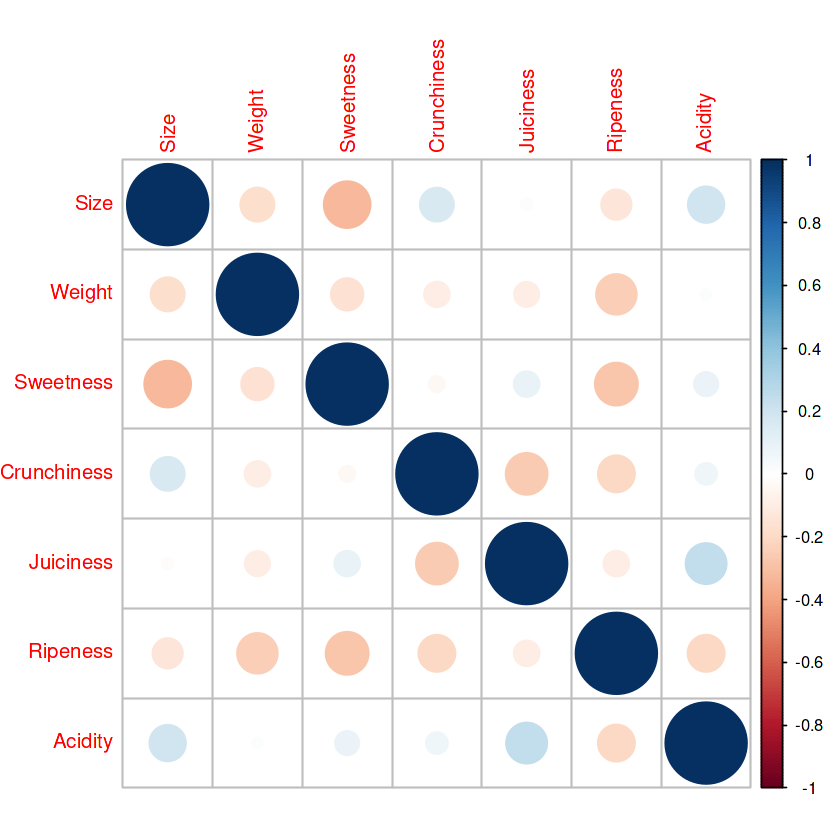

In [9]:
quality_data <- select(data, Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness, Acidity)
cor_matrix <- cor(quality_data)
corrplot(cor_matrix)

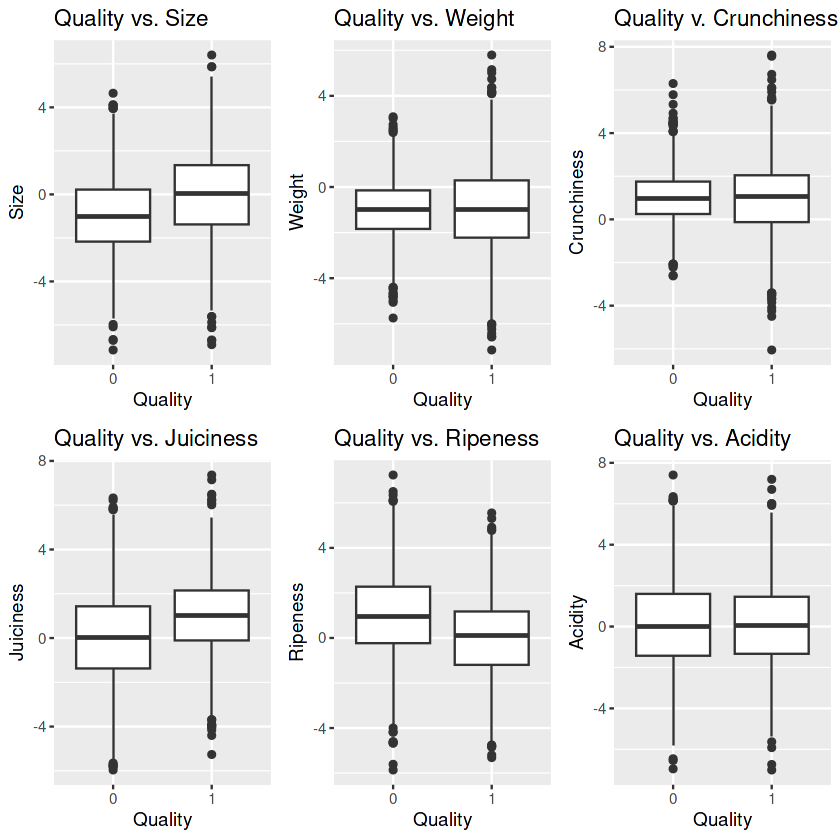

In [10]:
p1 <- ggplot(data, aes(x = Quality, y = Size)) + 
  geom_boxplot()  +
  labs(x = "Quality", y = "Size", 
       title = "Quality vs. Size", fill = "Quality")

p2 <- ggplot(data, aes(x = Quality, y = Weight)) + 
  geom_boxplot()  +
  labs(x = "Quality", y = "Weight", 
       title = "Quality vs. Weight", fill = "Quality")

p3 <- ggplot(data, aes(x = Quality, y = Crunchiness)) + 
  geom_boxplot()  +
  labs(x = "Quality", y = "Crunchiness", 
       title = "Quality v. Crunchiness", fill = "Quality")

p4 <- ggplot(data, aes(x = Quality, y = Juiciness)) + 
  geom_boxplot()  +
  labs(x = "Quality", y = "Juiciness", 
       title = "Quality vs. Juiciness", fill = "Quality")

p5 <- ggplot(data, aes(x = Quality, y = Ripeness)) + 
  geom_boxplot()  +
  labs(x = "Quality", y = "Ripeness", 
       title = "Quality vs. Ripeness", fill = "Quality")

p6 <- ggplot(data, aes(x = Quality, y = Acidity)) + 
  geom_boxplot()  +
  labs(x = "Quality", y = "Acidity", 
       title = "Quality vs. Acidity")

grid.arrange(p1, p2, p3, p4, p5, p6, nrow = 2)

## Train-test split

In [11]:
set.seed(123) # for reproducibility

index <- createDataPartition(data$Quality, p = 0.8, list = FALSE)

training_data <- data[index, ]
testX <- data[-index, ]
testy <- testX$Quality
testX$Quality <- NULL

## Model building

In [12]:
quality_model <- glm(formula = Quality ~ ., data = training_data, family = binomial(link = "logit"))
summary(quality_model)


Call:
glm(formula = Quality ~ ., family = binomial(link = "logit"), 
    data = training_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7458  -0.8243   0.1591   0.8448   2.8194  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.63787    0.06907   9.235  < 2e-16 ***
Size         0.65099    0.03156  20.630  < 2e-16 ***
Weight       0.27017    0.03196   8.452  < 2e-16 ***
Sweetness    0.57910    0.03081  18.796  < 2e-16 ***
Crunchiness  0.03570    0.03403   1.049    0.294    
Juiciness    0.45194    0.02744  16.471  < 2e-16 ***
Ripeness    -0.11929    0.02776  -4.298 1.73e-05 ***
Acidity     -0.30808    0.02424 -12.711  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4437.5  on 3200  degrees of freedom
Residual deviance: 3271.8  on 3193  degrees of freedom
AIC: 3287.8

Number of Fisher Scoring iterations: 5


## Model evaluation

### Confusion matrix and quality metrics

In [13]:
predicted_probs <- predict(quality_model, newdata = testX, type = "response")
predicted_classes <- factor(ifelse(predicted_probs > 0.5, 1, 0), levels = c(0,1))
                            
conf_matrix <- table(Actual = testy, Predicted = predicted_classes)

confusionMatrix(conf_matrix)

Confusion Matrix and Statistics

      Predicted
Actual   0   1
     0 290 109
     1  98 302
                                         
               Accuracy : 0.7409         
                 95% CI : (0.7091, 0.771)
    No Information Rate : 0.5144         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.4818         
                                         
 Mcnemar's Test P-Value : 0.487          
                                         
            Sensitivity : 0.7474         
            Specificity : 0.7348         
         Pos Pred Value : 0.7268         
         Neg Pred Value : 0.7550         
             Prevalence : 0.4856         
         Detection Rate : 0.3630         
   Detection Prevalence : 0.4994         
      Balanced Accuracy : 0.7411         
                                         
       'Positive' Class : 0              
                                         

### ROC curve

Setting levels: control = 0, case = 1

Setting direction: controls < cases



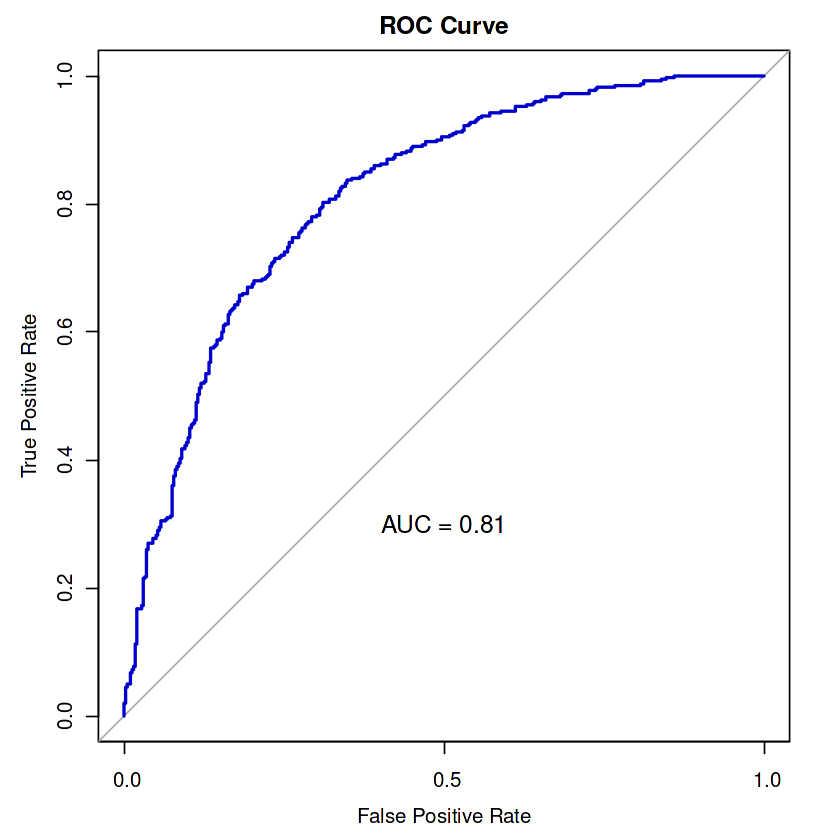

In [14]:
roc_curve <- roc(response = testy, predictor = predicted_probs)
plot(roc_curve, main = "ROC Curve", col = "blue3", lwd = 2,
     percent = TRUE, legacy.axes = TRUE, xlab = "False Positive Rate",
     ylab = "True Positive Rate", type = "stairs")
text(0.5, 0.3, paste("AUC =", round(auc(roc_curve), 2)), cex = 1.2, col = "black")